# US Degree Graduate Salary Analysis

## Defining the Question

I am eager to discover the most lucrative degrees, with a specific focus on those in the United Kingdom. Unfortunately, I couldn't find an appropriate dataset for the UK, so I've opted for a US dataset. While I recognise that the salary levels may differ between the US and the UK, I believe this dataset will still be valuable in identifying degrees in the UK that offer a high return on investment.

## Opening and Exploring the Dataset 

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [51]:
data = pd.read_csv('/Users/tishksuran/Downloads/archive (6)/degrees-that-pay-back.csv', delimiter=',')

In [52]:
data.head()

,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Percent change from Starting to Mid-Career Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Accounting,"$46,000.00","$77,100.00",67.6,"$42,200.00","$56,100.00","$108,000.00","$152,000.00"
1,Aerospace Engineering,"$57,700.00","$101,000.00",75.0,"$64,300.00","$82,100.00","$127,000.00","$161,000.00"
2,Agriculture,"$42,600.00","$71,900.00",68.8,"$36,300.00","$52,100.00","$96,300.00","$150,000.00"
3,Anthropology,"$36,800.00","$61,500.00",67.1,"$33,800.00","$45,500.00","$89,300.00","$138,000.00"
4,Architecture,"$41,600.00","$76,800.00",84.6,"$50,600.00","$62,200.00","$97,000.00","$136,000.00"


## Cleaning the Data and Making Conversions 

At the time of doing this analysis (31st of December 2023) 1 USD is equal to 0.78 GBP, so we will be going with that conversion rate for this analysis. The issue is, that all the data is given as strings rather than integers, so we will have to make that conversion before we can continue with the analysis as well.

In [53]:
data['Starting Median Salary'] = data['Starting Median Salary'].replace('[\$,]', '', regex=True).astype(float)
data['Mid-Career Median Salary'] = data['Mid-Career Median Salary'].replace('[\$,]', '', regex=True).astype(float)

data['Mid-Career 10th Percentile Salary'] = data['Mid-Career 10th Percentile Salary'].replace('[\$,]', '', regex=True).astype(float)
data['Mid-Career 25th Percentile Salary'] = data['Mid-Career 25th Percentile Salary'].replace('[\$,]', '', regex=True).astype(float)
data['Mid-Career 75th Percentile Salary'] = data['Mid-Career 75th Percentile Salary'].replace('[\$,]', '', regex=True).astype(float)
data['Mid-Career 90th Percentile Salary'] = data['Mid-Career 90th Percentile Salary'].replace('[\$,]', '', regex=True).astype(float)

data.rename(columns={'Undergraduate Major': 'Undergraduate Degree'}, inplace=True)

In [54]:
data.head()

,Undergraduate Degree,Starting Median Salary,Mid-Career Median Salary,Percent change from Starting to Mid-Career Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Accounting,46000.0,77100.0,67.6,42200.0,56100.0,108000.0,152000.0
1,Aerospace Engineering,57700.0,101000.0,75.0,64300.0,82100.0,127000.0,161000.0
2,Agriculture,42600.0,71900.0,68.8,36300.0,52100.0,96300.0,150000.0
3,Anthropology,36800.0,61500.0,67.1,33800.0,45500.0,89300.0,138000.0
4,Architecture,41600.0,76800.0,84.6,50600.0,62200.0,97000.0,136000.0


Converting from USD to GDB

In [55]:
data['Starting Median Salary'] = data['Starting Median Salary'] * 0.78
data['Mid-Career Median Salary'] = data['Mid-Career Median Salary'] * 0.78

data['Mid-Career 10th Percentile Salary'] = data['Mid-Career 10th Percentile Salary'] * 0.78
data['Mid-Career 25th Percentile Salary'] = data['Mid-Career 25th Percentile Salary'] * 0.78
data['Mid-Career 75th Percentile Salary'] = data['Mid-Career 75th Percentile Salary'] * 0.78
data['Mid-Career 90th Percentile Salary'] = data['Mid-Career 90th Percentile Salary'] * 0.78

In [56]:
data.head()

,Undergraduate Degree,Starting Median Salary,Mid-Career Median Salary,Percent change from Starting to Mid-Career Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Accounting,35880.0,60138.0,67.6,32916.0,43758.0,84240.0,118560.0
1,Aerospace Engineering,45006.0,78780.0,75.0,50154.0,64038.0,99060.0,125580.0
2,Agriculture,33228.0,56082.0,68.8,28314.0,40638.0,75114.0,117000.0
3,Anthropology,28704.0,47970.0,67.1,26364.0,35490.0,69654.0,107640.0
4,Architecture,32448.0,59904.0,84.6,39468.0,48516.0,75660.0,106080.0


It is a common standard for jobs in the UK to offer salaries approximately 40% lower than their counterparts in the US. As a result, we will multiply all these figures by 0.6 to provide a more accurate representation of how much these degrees pay in the UK.

In [57]:
data['Starting Median Salary'] = data['Starting Median Salary'] * 0.6
data['Mid-Career Median Salary'] = data['Mid-Career Median Salary'] * 0.6

data['Mid-Career 10th Percentile Salary'] = data['Mid-Career 10th Percentile Salary'] * 0.6
data['Mid-Career 25th Percentile Salary'] = data['Mid-Career 25th Percentile Salary'] * 0.6
data['Mid-Career 75th Percentile Salary'] = data['Mid-Career 75th Percentile Salary'] * 0.6
data['Mid-Career 90th Percentile Salary'] = data['Mid-Career 90th Percentile Salary'] * 0.6

In [58]:
data.head()

,Undergraduate Degree,Starting Median Salary,Mid-Career Median Salary,Percent change from Starting to Mid-Career Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Accounting,21528.0,36082.8,67.6,19749.6,26254.8,50544.0,71136.0
1,Aerospace Engineering,27003.6,47268.0,75.0,30092.4,38422.8,59436.0,75348.0
2,Agriculture,19936.8,33649.2,68.8,16988.4,24382.8,45068.4,70200.0
3,Anthropology,17222.4,28782.0,67.1,15818.4,21294.0,41792.4,64584.0
4,Architecture,19468.8,35942.4,84.6,23680.8,29109.6,45396.0,63648.0


Now that the data has been cleaned, and conversions have been made. We can now proceed with our analysis.

## Analysing the Data

I will conduct the analysis in a question-and-answer format, addressing inquiries such as 'Which degree offers the highest starting salary?' This will conveniently be the first question I address.

### Which Undergraduate Degree has the Highest Starting Median Salary?

In [59]:
ordered_data = data.sort_values(['Starting Median Salary'], ascending=[0])

In [60]:
ordered_data.head()

,Undergraduate Degree,Starting Median Salary,Mid-Career Median Salary,Percent change from Starting to Mid-Career Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
43,Physician Assistant,34772.4,42915.6,23.4,31075.2,35193.6,50544.0,58032.0
8,Chemical Engineering,29577.6,50076.0,69.3,33649.2,40856.4,66924.0,90792.0
12,Computer Engineering,28735.2,49140.0,71.0,30934.8,39358.8,63180.0,75816.0
19,Electrical Engineering,28501.2,48204.0,69.1,32432.4,39218.4,60840.0,78624.0
38,Mechanical Engineering,27097.2,43804.8,61.7,29811.6,35661.6,56160.0,76284.0


From the data, we can easily tell that 'Physician Assistant' is the highest paying undegraduate degree, but it would also be able to see this in a visual way.

<BarContainer object of 50 artists>

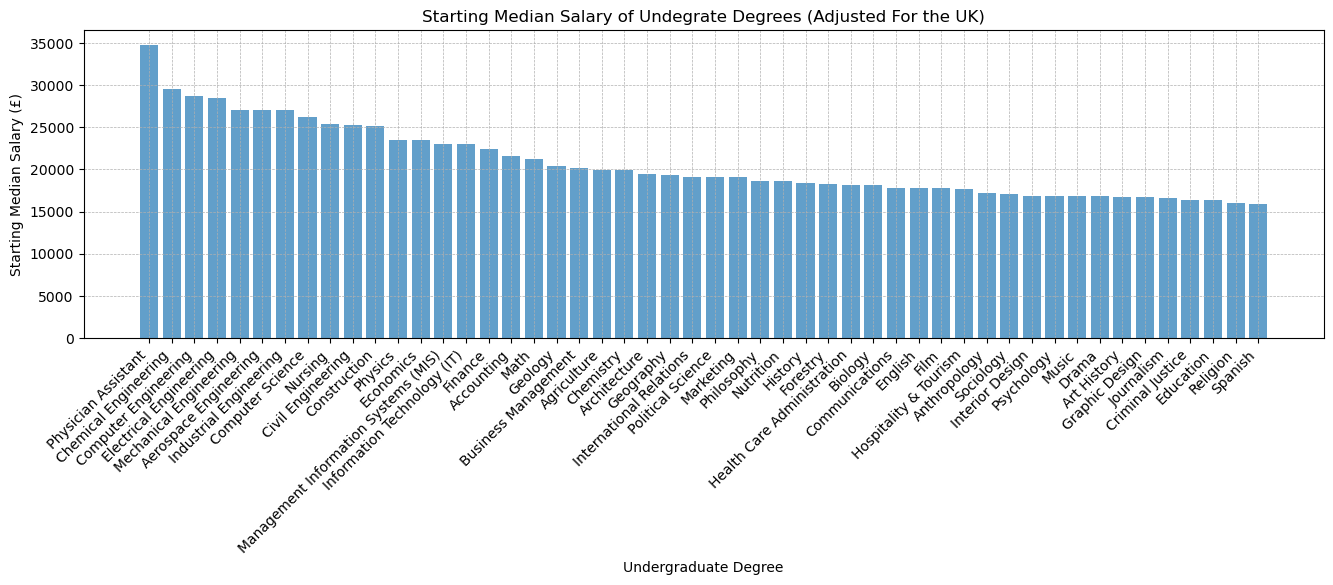

In [76]:
X = ordered_data['Undergraduate Degree']
Y = ordered_data['Starting Median Salary']

plt.figure(figsize=(16,4))
plt.xlabel('Undergraduate Degree')
plt.ylabel('Starting Median Salary (£)')
plt.title('Starting Median Salary of Undegrate Degrees (Adjusted For the UK)')

plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(rotation=45, ha='right')
plt.bar(X,Y, alpha=0.7)

### Which Undergraduate Degree has the Highest Mid-Career Median Salary?

In [77]:
ordered_data = data.sort_values(['Mid-Career Median Salary'], ascending=[0])

In [80]:
ordered_data.head()

,Undergraduate Degree,Starting Median Salary,Mid-Career Median Salary,Percent change from Starting to Mid-Career Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
8,Chemical Engineering,29577.6,50076.0,69.3,33649.2,40856.4,66924.0,90792.0
12,Computer Engineering,28735.2,49140.0,71.0,30934.8,39358.8,63180.0,75816.0
19,Electrical Engineering,28501.2,48204.0,69.1,32432.4,39218.4,60840.0,78624.0
1,Aerospace Engineering,27003.6,47268.0,75.0,30092.4,38422.8,59436.0,75348.0
17,Economics,23446.8,46144.8,96.8,23680.8,33040.8,67860.0,98280.0


<BarContainer object of 50 artists>

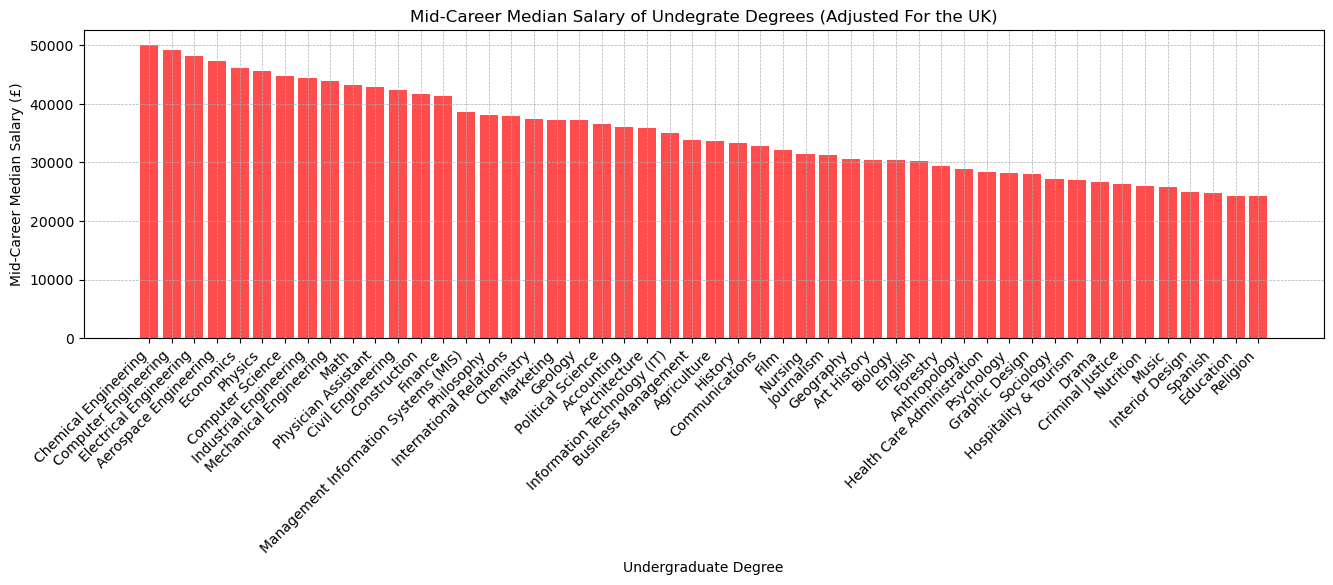

In [82]:
X = ordered_data['Undergraduate Degree']
Y = ordered_data['Mid-Career Median Salary']

plt.figure(figsize=(16,4))
plt.xlabel('Undergraduate Degree')
plt.ylabel('Mid-Career Median Salary (£)')
plt.title('Mid-Career Median Salary of Undegrate Degrees (Adjusted For the UK)')

plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(rotation=45, ha='right')
plt.bar(X,Y, alpha=0.7, color='red')

### How does the Starting Median Salary differ from the Mid-Career Median Salary?

In [84]:
data.head()

,Undergraduate Degree,Starting Median Salary,Mid-Career Median Salary,Percent change from Starting to Mid-Career Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Accounting,21528.0,36082.8,67.6,19749.6,26254.8,50544.0,71136.0
1,Aerospace Engineering,27003.6,47268.0,75.0,30092.4,38422.8,59436.0,75348.0
2,Agriculture,19936.8,33649.2,68.8,16988.4,24382.8,45068.4,70200.0
3,Anthropology,17222.4,28782.0,67.1,15818.4,21294.0,41792.4,64584.0
4,Architecture,19468.8,35942.4,84.6,23680.8,29109.6,45396.0,63648.0


In [86]:
selected_columns = ['Undergraduate Degree', 'Starting Median Salary', 'Mid-Career Median Salary']
df = data[selected_columns]

In [89]:
df.loc[:, 'Difference in Starting Median Salary and Mid-Career Median Salary'] = df['Mid-Career Median Salary'] - df['Starting Median Salary']

In [91]:
del df['Mid-Career Median Salary']
del df['Starting Median Salary']

In [99]:
df = df.sort_values(['Difference in Starting Median Salary and Mid-Career Median Salary'], ascending=[0])
df.head()

,Undergraduate Degree,Difference in Starting Median Salary and Mid-Career Median Salary
17,Economics,22698.0
44,Physics,21996.0
37,Math,21996.0
8,Chemical Engineering,20498.4
12,Computer Engineering,20404.8


<BarContainer object of 50 artists>

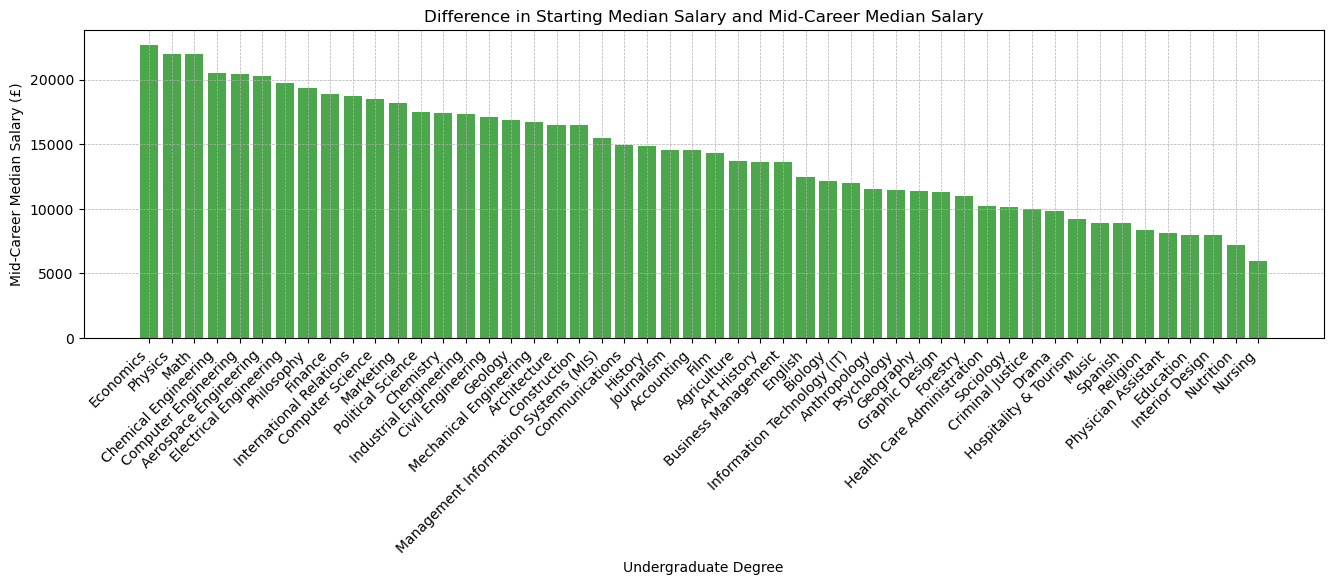

In [100]:
X = df['Undergraduate Degree']
Y = df['Difference in Starting Median Salary and Mid-Career Median Salary']


plt.figure(figsize=(16,4))
plt.xlabel('Undergraduate Degree')
plt.ylabel('Mid-Career Median Salary (£)')
plt.title('Difference in Starting Median Salary and Mid-Career Median Salary')

plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(rotation=45, ha='right')
plt.bar(X,Y, alpha=0.7, color='green')

<BarContainer object of 50 artists>

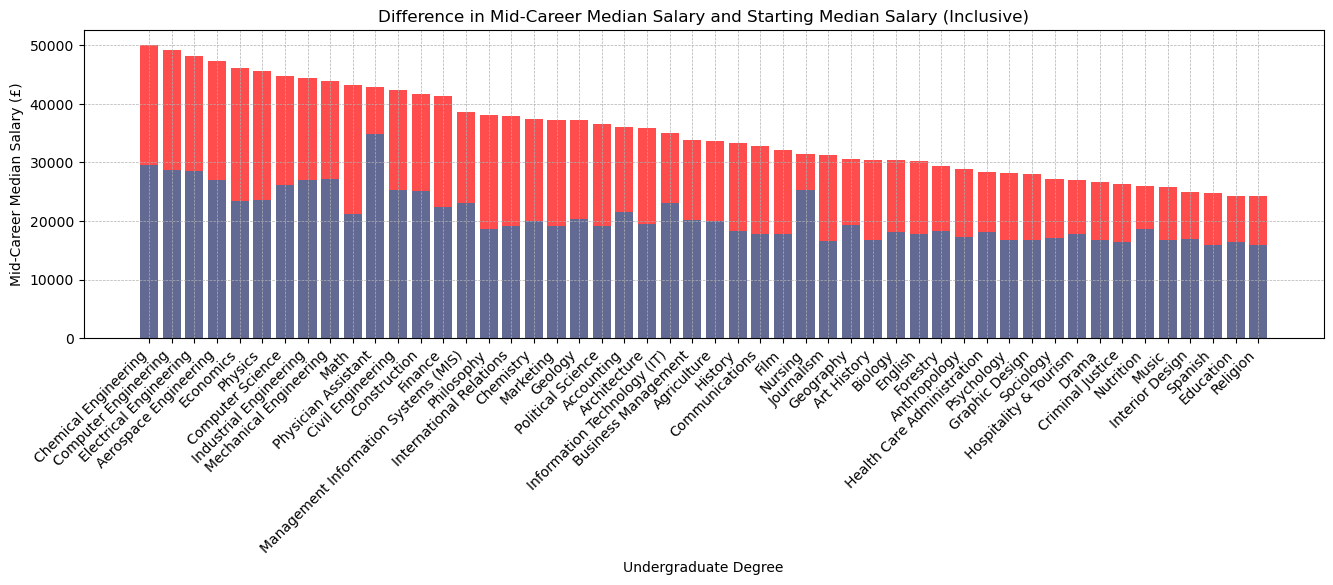

In [102]:
X = ordered_data['Undergraduate Degree']
Y = ordered_data['Mid-Career Median Salary']

x = ordered_data['Undergraduate Degree']
y = ordered_data['Starting Median Salary']

plt.figure(figsize=(16,4))
plt.xlabel('Undergraduate Degree')
plt.ylabel('Mid-Career Median Salary (£)')
plt.title('Difference in Mid-Career Median Salary and Starting Median Salary (Inclusive)')

plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(rotation=45, ha='right')
plt.bar(X,Y, alpha=0.7, color='red')
plt.bar(x,y, alpha=0.7)

## Summary of the Analysis 

While this data analysis offers valuable insights, it's crucial to recognize its limitations, particularly in the oversimplified use of a uniform adjustment factor. Applying a blanket multiplier of 0.6 to all salaries to reflect a 40% decrease in the average salary in the UK, compared to the country of origin, may not fully capture the nuanced variations in wage differences across different degrees. The actual wage disparity is likely to vary between degrees. To assess the validity of this analysis, my next step involves comparing it with a true UK graduate salary database.

## UK Graduate Salary Analysis 

As mentioned earlier, I was unable to locate a specific database for UK graduate salaries. However, I have identified tables on various websites that I plan to convert into a Pandas DataFrame. This will assist me in conducting data analysis using authentic UK data, allowing for a comparison with my US to UK conversion.

### Opening and Exploring the Dataset

In [189]:
uk_data = pd.read_csv('/Users/tishksuran/Downloads/sb263-figure-14.csv', delimiter=',')

In [190]:
uk_data.head()

,Subject area of degree,High skilled,Medium skilled,Low skilled,All skill levels
0,01 Medicine and dentistry,"£34,000","£20,000",NaN,"£34,000"
1,02 Subjects allied to medicine,"£25,000","£20,000","£18,500","£25,000"
2,03 Biological and sport sciences,"£25,000","£19,500","£18,500","£23,000"
3,04 Psychology,"£23,000","£19,000","£18,000","£21,500"
4,05 Veterinary sciences,"£31,000","£19,000",NaN,"£31,000"


### Cleaning the Data 

Through exploring the data, a few things are evident, first and formost, it is not in the same format and once again, the values are given as strings rather than integers or floats, so this will be the first action towards cleaning the data. 

In [191]:
uk_data['High skilled'] = uk_data['High skilled'].replace('[\£,]', '', regex=True).astype(float)
uk_data['Medium skilled'] = uk_data['Medium skilled'].replace('[\£,]', '', regex=True).astype(float)
uk_data['Low skilled'] = uk_data['Low skilled'].replace('[\£,]', '', regex=True).astype(float)

del uk_data['All skill levels']

In [192]:
uk_data.head()

,Subject area of degree,High skilled,Medium skilled,Low skilled
0,01 Medicine and dentistry,34000.0,20000.0,NaN
1,02 Subjects allied to medicine,25000.0,20000.0,18500.0
2,03 Biological and sport sciences,25000.0,19500.0,18500.0
3,04 Psychology,23000.0,19000.0,18000.0
4,05 Veterinary sciences,31000.0,19000.0,NaN


What makes this table particularly noteworthy is that, in contrast to the US dataset, the undergraduate salary is divided into three distinct features. To facilitate a more accurate comparison, it is advisable to calculate the average of these three columns. This approach will enable a meaningful comparison with our original dataset.

In [193]:
uk_data['Mean Undergraduate Salary'] = round(uk_data[['High skilled', 'Medium skilled', 'Low skilled']].mean(axis=1, skipna=True))

In [194]:
columns_to_delete = ['High skilled', 'Medium skilled', 'Low skilled']
uk_data.drop(columns=columns_to_delete, inplace=True)

In [195]:
uk_data.head()

,Subject area of degree,Mean Undergraduate Salary
0,01 Medicine and dentistry,27000.0
1,02 Subjects allied to medicine,21167.0
2,03 Biological and sport sciences,21000.0
3,04 Psychology,20000.0
4,05 Veterinary sciences,25000.0


I would also like to remove the two values at the start of each subject area, which I will do now.

In [196]:
uk_data['Subject area of degree'] = uk_data['Subject area of degree'].replace('\d+', '', regex=True)
last_row_index = uk_data.index[-1]
uk_data.drop(last_row_index, inplace=True)

In [197]:
uk_data

,Subject area of degree,Mean Undergraduate Salary
0,Medicine and dentistry,27000.0
1,Subjects allied to medicine,21167.0
2,Biological and sport sciences,21000.0
3,Psychology,20000.0
4,Veterinary sciences,25000.0
5,"Agriculture, food and related studies",21500.0
6,Physical sciences,21833.0
7,Mathematical sciences,22833.0
8,Engineering and technology,23667.0
9,Computing,21833.0


### Visualising the Data

<BarContainer object of 22 artists>

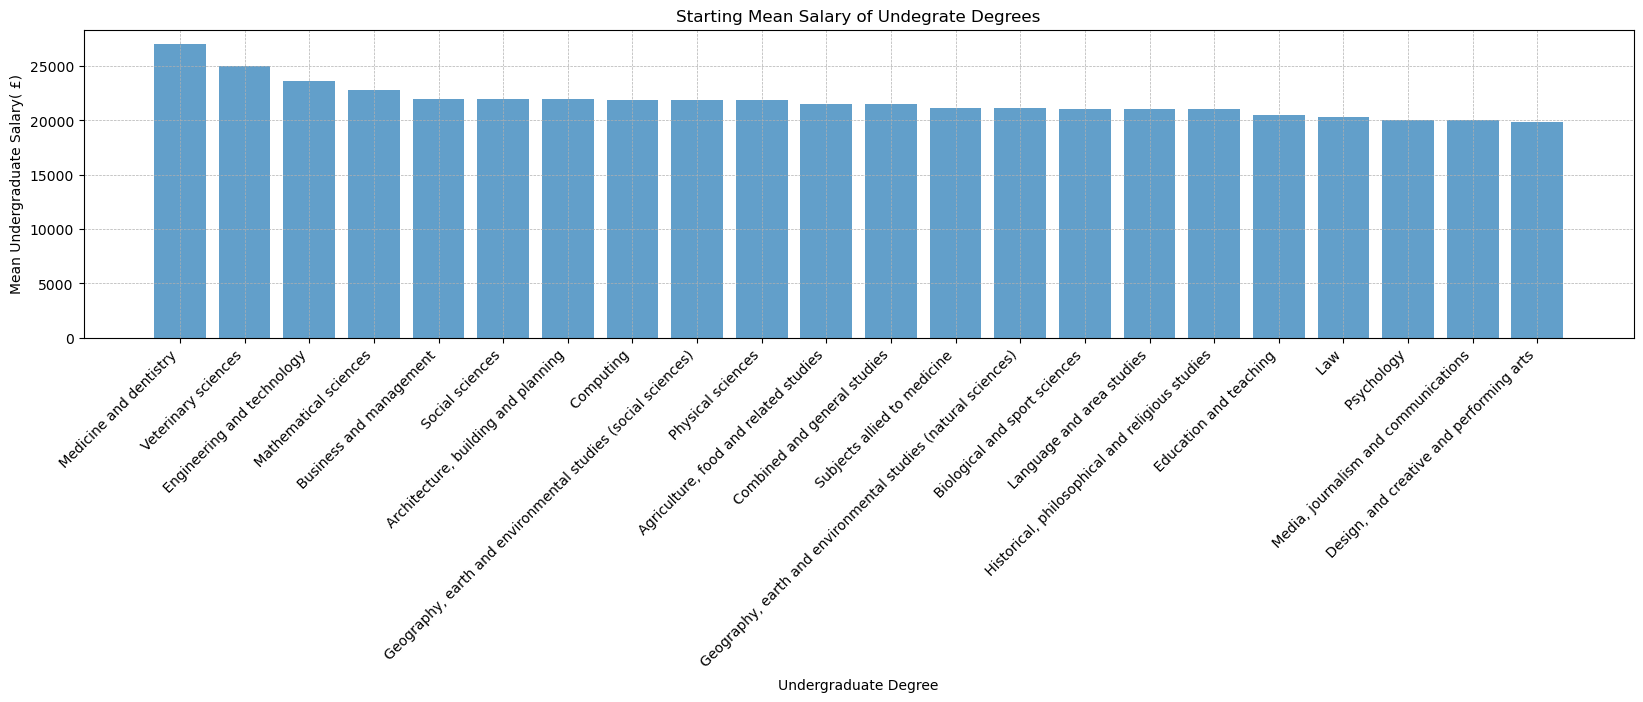

In [208]:
uk_data = uk_data.sort_values(['Mean Undergraduate Salary'], ascending=[0])

Y = uk_data['Mean Undergraduate Salary']
X = uk_data['Subject area of degree']


plt.figure(figsize=(20,4))
plt.xlabel('Undergraduate Degree')
plt.ylabel('Mean Undergraduate Salary( £)')
plt.title('Starting Mean Salary of Undegrate Degrees')

plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(rotation=45, ha='right')
plt.bar(X,Y, alpha=0.7)


<BarContainer object of 50 artists>

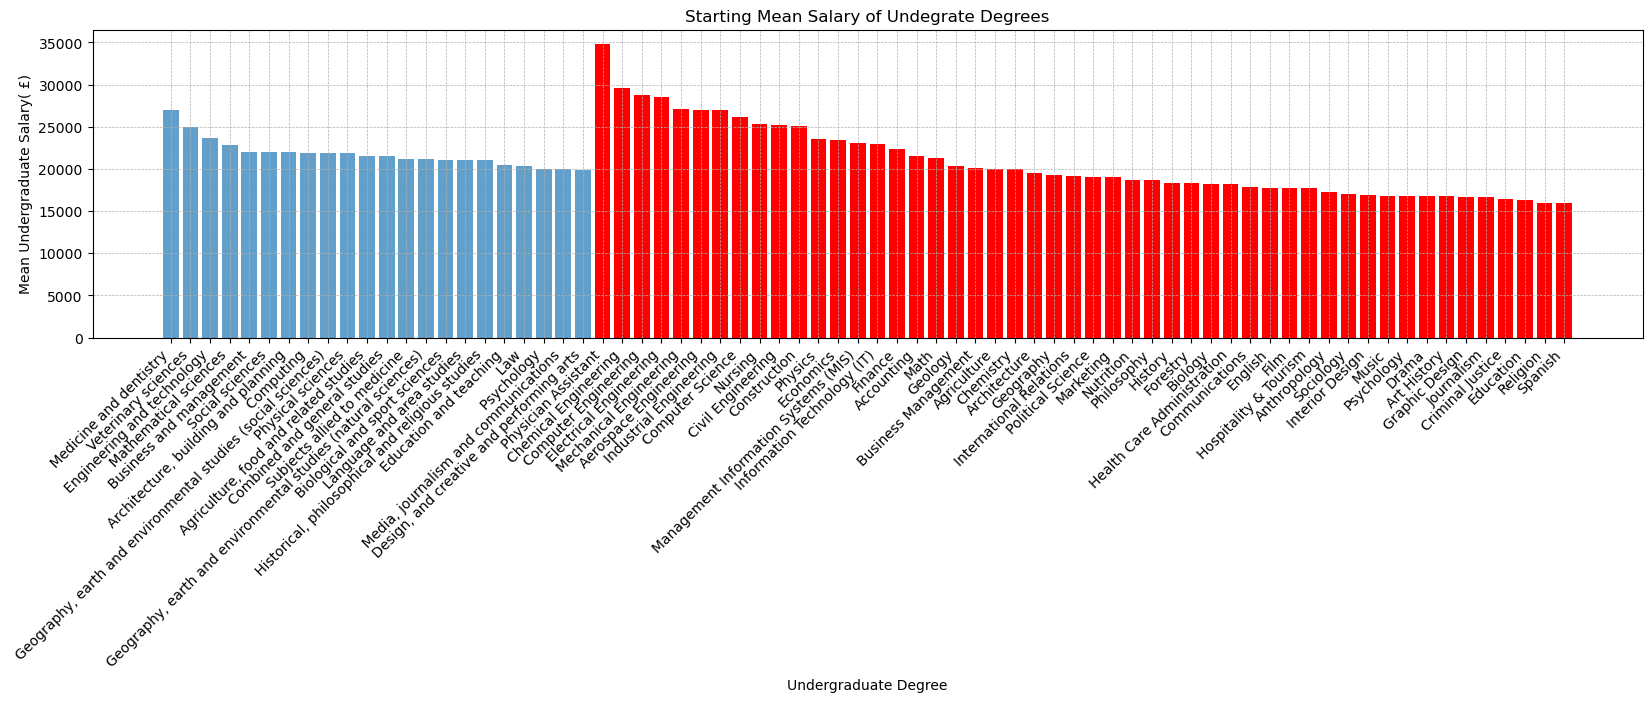

In [212]:
uk_data = uk_data.sort_values(['Mean Undergraduate Salary'], ascending=[0])
ordered_data = ordered_data.sort_values(['Starting Median Salary'], ascending=[0])

Y = uk_data['Mean Undergraduate Salary']
X = uk_data['Subject area of degree']

x = ordered_data['Undergraduate Degree']
y = ordered_data['Starting Median Salary']


plt.figure(figsize=(20,4))
plt.xlabel('Undergraduate Degree')
plt.ylabel('Mean Undergraduate Salary( £)')
plt.title('Starting Mean Salary of Undegrate Degrees')

plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(rotation=45, ha='right')
plt.bar(X,Y, alpha=0.7)
plt.bar(x,y, color='red')

Even through an indirect analysis, it becomes evident that our predictions for UK undergraduate salaries, derived from US undergraduate salaries, were slightly off, though not significantly. We will now conduct a direct analysis to precisely determine the extent of the deviation from our initial predictions.

### Direct Comparison Between UK and US Derived UK Estimated Salary 

Comparing Computing Related Degrees:

In [219]:
uk_data.head()

,Subject area of degree,Mean Undergraduate Salary
0,Medicine and dentistry,27000.0
4,Veterinary sciences,25000.0
8,Engineering and technology,23667.0
7,Mathematical sciences,22833.0
14,Business and management,22000.0


In [222]:
us_data = ordered_data

In [223]:
us_data.head()

,Undergraduate Degree,Starting Median Salary,Mid-Career Median Salary,Percent change from Starting to Mid-Career Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
43,Physician Assistant,34772.4,42915.6,23.4,31075.2,35193.6,50544.0,58032.0
8,Chemical Engineering,29577.6,50076.0,69.3,33649.2,40856.4,66924.0,90792.0
12,Computer Engineering,28735.2,49140.0,71.0,30934.8,39358.8,63180.0,75816.0
19,Electrical Engineering,28501.2,48204.0,69.1,32432.4,39218.4,60840.0,78624.0
38,Mechanical Engineering,27097.2,43804.8,61.7,29811.6,35661.6,56160.0,76284.0


In [224]:
del us_data['Mid-Career Median Salary']
del us_data['Percent change from Starting to Mid-Career Salary']
del us_data['Mid-Career 10th Percentile Salary']
del us_data['Mid-Career 25th Percentile Salary']
del us_data['Mid-Career 75th Percentile Salary']
del us_data['Mid-Career 90th Percentile Salary']

In [302]:
us_data.head()

,Undergraduate Degree,Starting Median Salary
43,Physician Assistant,34772.4
8,Chemical Engineering,29577.6
12,Computer Engineering,28735.2
19,Electrical Engineering,28501.2
38,Mechanical Engineering,27097.2


In [285]:
us_computing_related_rows = us_data.loc[(us_data['Undergraduate Degree'] == 'Computer Engineering') | (us_data['Undergraduate Degree'] == 'Computer Science') | (us_data['Undergraduate Degree'] == 'Management Information Systems (MIS)') | (us_data['Undergraduate Degree'] == 'Information Technology (IT)')]

In [286]:
us_computing_related_rows

,Undergraduate Degree,Starting Median Salary
12,Computer Engineering,28735.2
13,Computer Science,26161.2
35,Management Information Systems (MIS),23025.6
31,Information Technology (IT),22978.8


In [295]:
us_computing_related_rows

,Undergraduate Degree,Starting Median Salary,Average US Computing Related Degree Salary
12,Computer Engineering,28735.2,25225.2
13,Computer Science,26161.2,25225.2
35,Management Information Systems (MIS),23025.6,25225.2
31,Information Technology (IT),22978.8,25225.2


In [292]:
uk_computing_row = uk_data.iloc[[2]]

In [293]:
uk_computing_row

,Subject area of degree,Mean Undergraduate Salary
8,Engineering and technology,23667.0


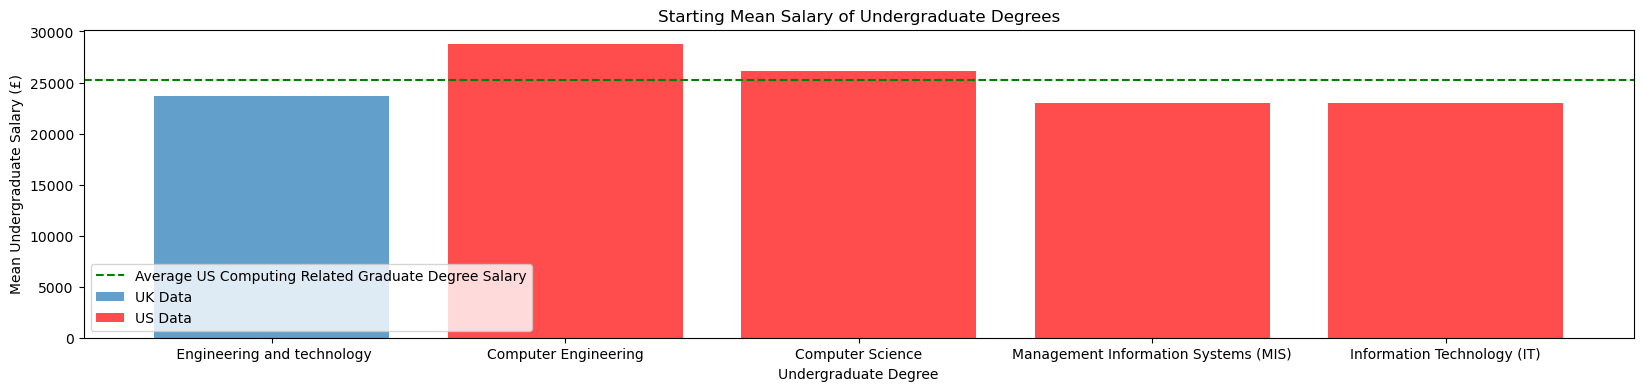

In [301]:
import matplotlib.pyplot as plt

X = uk_computing_row['Subject area of degree']
Y = uk_computing_row['Mean Undergraduate Salary']

x = us_computing_related_rows['Undergraduate Degree']
y = us_computing_related_rows['Starting Median Salary']

mean_salary = us_computing_related_rows['Starting Median Salary'].mean()

plt.figure(figsize=(20, 4))

plt.bar(X, Y, alpha=0.7, label='UK Data')

plt.bar(x, y, color='red', alpha=0.7, label='US Data')

plt.axhline(y=mean_salary, color='green', linestyle='--', label='Average US Computing Related Graduate Degree Salary')

plt.xlabel('Undergraduate Degree')
plt.ylabel('Mean Undergraduate Salary (£)')
plt.title('Starting Mean Salary of Undergraduate Degrees')

plt.legend()

plt.show()


As illustrated in this graph, after averaging the salaries of various related degrees in the US and comparing them to their counterparts in the UK, the difference is not significant. The green dashed line represents the average starting median salary for US computing-related graduate degrees, while the red bars depict the individual degree salaries. When compared to the mean undergraduate salary for computing-related degrees in the UK, represented by the blue bars, the overall trend shows a relatively close alignment between the two regions.